<font size="6px" font color="blue" face="Times New Roman"><b> Modelagem de perfis de poços</b></font>


#### Código desenvolvido no meu TCC em parceria com:

#### Dr. Victor Carreira (UFF): http://lattes.cnpq.br/9663791782095105
#### Dr. Rodrigo Bijani (UFF): http://lattes.cnpq.br/2331435604103641

In [1]:
#Pacotes
# -*- coding: utf-8 -*- 
%matplotlib notebook 

import numpy as np
import pylab as py
import scipy as sp
from scipy import signal
from scipy.signal import correlate
import matplotlib.pyplot as plt
import IPython as ipw
#-------------------------------------
#novos pacotes de imagem
import imageio
from skimage import data, io, filters 
#-------------------------------------
import sys

#pacotes de visualização de dados
import pandas as pd


In [2]:
# Importar pacotos externos:
sys.path.insert(0,'../modules')

import noise as noi
import modeling 

In [3]:
# leitura da seção geologica:
ma = io.imread("../entrada/Namorado_7.png", as_gray=False, pilmode="RGBA")


In [4]:
#### Conversão de coordenadas pixel para métrica

nx = np.shape(ma)[1] # Valores em pixel da imagem
nz = np.shape(ma)[0]

print(nx, nz)

xt = np.linspace(0, 4200, nx, endpoint=True) # O segundo campo do linsspace tem que ser a coordenada real da seção
zt = np.linspace(0, 170, nz, endpoint=True) # 4200 e 170 são dimensões da seção real.

5189 2396


<IPython.core.display.Javascript object>


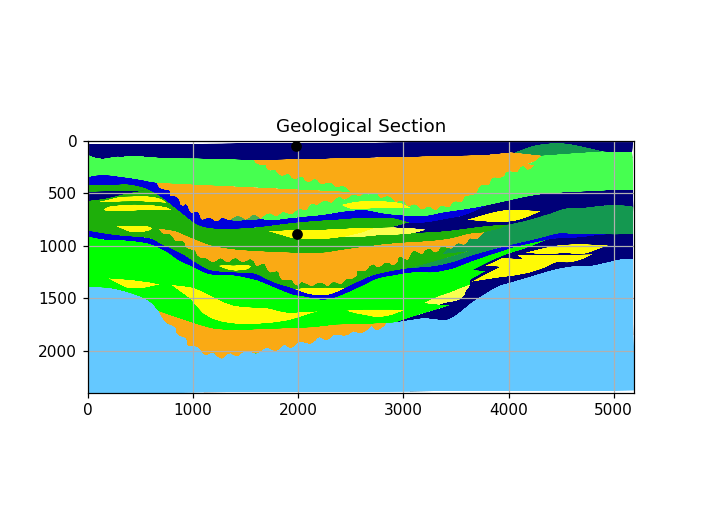

In [5]:
# leitura da seção geologica:

# funcao que perfura e salva as coordenadas de inicio e fim da perfuracao:
x,y = modeling.drilling(ma)

In [6]:
# Cotas para extrair do banco de cores da secao geologica:
cota_m = [xt[int(x[0])], zt[int(min(y))], zt[int(max(y))]] # Coordenadas convertidas em metros
cota_p = [int(x[0]), int(min(y)), int(max(y))] # Coordenadas em pixel (original)

# Criando e escrevendo em arquivos de texto (modo 'w'). Saída de dados do clique
arquivo = open('../saida/cotas.txt','w')
arquivo.write( str(cota_m[1]) )
arquivo.write("  ")
arquivo.write( str(cota_m[2]) )
arquivo.write("  ")
arquivo.write( str(cota_m[0]) )
arquivo.close()

In [7]:
# Cotas para extrair do banco de cores da secao geologica:
cota_m = [xt[int(x[0])], zt[int(min(y))], zt[int(max(y))]] # Coordenadas convertidas em metros
cota_p = [int(x[0]), int(min(y)), int(max(y))] # Coordenadas em pixel (original)

# Criando e escrevendo em arquivos de texto (modo 'w'). Saída de dados do clique
arquivo = open('../saida/cotas.txt','w')
arquivo.write( str(cota_m[1]) )
arquivo.write("  ")
arquivo.write( str(cota_m[2]) )
arquivo.write("  ")
arquivo.write( str(cota_m[0]) )
arquivo.close()

In [8]:
print(cota_m, cota_p)

[1602.1202775636082, 3.8329853862212944, 63.24425887265136] [1979, 54, 891]


In [9]:
########################################### Etapa de codificação ##################################################

cab = ['n','R', 'G', 'B', 'A','Hex', 'Name']
data = pd.read_csv('../entrada/geocodes.txt', sep='\s+',skiprows=1, names = cab )

#data = pd.read_csv('entrada/geocodes.txt', header = None)
data

,n,R,G,B,A,Hex,Name
0,0,20,152,80,255,#149850,folhelho1
1,1,70,255,80,255,#46FF50,folhelho2
2,2,30,175,10,255,#1EAF0A,folhelho3
3,3,0,255,0,255,#00FF00,folhelho4
4,4,255,250,5,255,#FFFA05,arenito1
5,5,250,255,80,255,#FAFF50,arenito2
6,6,250,170,20,255,#FAAA14,conglomerado
7,7,0,0,120,255,#000078,marga1
8,8,0,0,220,255,#0000DC,marga2
9,9,100,200,255,255,#64C8FF,calcarenito


In [10]:
########################### Teste para criação do dicionário "codigo" a partir do txt #######################################

# Cálculo das distâncias em RGBA
w1 = np.sqrt(data['R']**2 + data['G']**2 + data['B']**2 + data['A']**2) # Operação métrica com o arquivo RGBA

codigo1 = {a1_: [a2_, a3_, a4_, a5_, a6_, a7_, a8_] for a1_, a2_, a3_, a4_, a5_, a6_, a7_, a8_
           in zip(data['n'], data['R'], data['G'], data['B'], data['A'], w1, data['Hex'], data['Name'])}

#codigo1[0][6]

In [11]:
##################################### Cálculo das distâncias dos RGBA ##################################################
# definindo  

zmin=int(cota_p[1]) 
zmax=int(cota_p[2])
h=int(cota_p[0])

# Conversão de coordenadas pixel para métrica (do poço clicado)
mb = np.copy(ma[zmin:zmax, h, :]) #Faz uma amostragem vertical na seção. Essa amostragem simula o poço.
prof = np.linspace(cota_m[1], cota_m[2], np.size(mb,0), endpoint=True) 


# Calcula as distancias no espaco das cores do RGBA:
dist = np.zeros(np.size(mb,0))
for i in range(np.size(mb,0)):
    dist[i] = np.sqrt((mb[i,0]**2 + mb[i,1]**2 + mb[i,2]**2 + mb[i,3]**2))
    
print(dist)

[281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441342 281.82441342 281.82441342 281.82441342 281.82441342
 281.82441

In [12]:
########## Tratando do bug nas transicoes entre as cores a partir do código criado pelo txt ###################
for i in range(np.size(mb,0)):
    if (dist[i] != codigo1[0][4] and dist[i] != codigo1[1][4] and dist[i] != codigo1[2][4] 
        and dist[i] != codigo1[3][4] and dist[i] != codigo1[4][4] and dist[i] != codigo1[5][4] 
        and dist[i] != codigo1[6][4] and dist[i] != codigo1[7][4]
        and dist[i] != codigo1[8][4] and dist[i] != codigo1[9][4]):
        dist[i] = dist[i-1]

#Todo: Automatizar o processo de captação do número de rocha da seção geológica.
dist

array([281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82441342,
       281.82441342, 281.82441342, 281.82441342, 281.82

In [13]:
### ---- # criacao do codigo de rocha para plot:     
nrocks = len(codigo1)
codrock = np.zeros(len(dist))
for i in range(len(dist)):
    for j in range(nrocks):
        if dist[i]==codigo1[j][4]:
            codrock[i]=j
            
codrock
### Obs: Adaptou-se a criação do código de rocha a partir do "codigo1" 

array([7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6.

In [14]:
### Esta célula salva os codigos dos poços oriundos do click.

c = pd.DataFrame(codrock)

c.to_csv('../saida/poco_click.txt', index=False, sep= ' ')

In [15]:
# Guardando os codigos de rocha existentes no poco perfurado e montando as cores:

litos = [] # Nomes das rochas la do dicionário
rock_poco = [] # Código das rochas
hex_cores = [] # Cor Hex das rochas la do dicionário
r = [] # Cores RGB lá do dicionário
g = []
b = []
a = []

shale1 = { } # folhelho1
shale2 = { } # folhelho2
shale3 = { } # folhelho3
shale4 = { } # folhelho4
sands1 = { } # arenito1
sands2 = { } # arenito2
congl  = { } # conglomerado
marl1  = { } # marga1
marl2  = { } # marga2
calca  = { } # calcarenito

if np.any(codrock == 0):
    rock_poco.append(0)
    hex_cores.append(codigo1[0][5])
    litos.append(codigo1[0][6])
    r.append(codigo1[0][0])
    g.append(codigo1[0][1])
    b.append(codigo1[0][2])
    a.append(codigo1[0][3])
    shale1 = {'rock': 'folhelho1','rhob': 2.12, 'gr': 115.0, 'dt': 62.0, 'ild': 1e3}

if np.any(codrock == 1):
    rock_poco.append(1)
    hex_cores.append(codigo1[1][5])
    litos.append(codigo1[1][6])
    r.append(codigo1[1][0])
    g.append(codigo1[1][1])
    b.append(codigo1[1][2])
    a.append(codigo1[1][3])
    shale2 = {'rock': 'folhelho2','rhob': 2.25, 'gr': 75.0, 'dt': 167.0, 'ild': 1e1}

if np.any(codrock == 2):
    rock_poco.append(2)
    hex_cores.append(codigo1[2][5])
    litos.append(codigo1[2][6])
    r.append(codigo1[2][0])
    g.append(codigo1[2][1])
    b.append(codigo1[2][2])
    a.append(codigo1[2][3])
    shale3 = {'rock': 'folhelho3','rhob': 2.43, 'gr': 40.0, 'dt': 132.0, 'ild': 1e5}
    
if np.any(codrock == 3):
    rock_poco.append(3)
    hex_cores.append(codigo1[3][5])
    litos.append(codigo1[3][6])
    r.append(codigo1[3][0])
    g.append(codigo1[3][1])
    b.append(codigo1[3][2])
    a.append(codigo1[3][3])
    shale4 = {'rock': 'folhelho4','rhob': 1.8, 'gr': 140.0, 'dt': 97.0, 'ild': 1e4}
    
if np.any(codrock == 4):
    rock_poco.append(4)
    hex_cores.append(codigo1[4][5])
    litos.append(codigo1[4][6])
    r.append(codigo1[4][0])
    g.append(codigo1[4][1])
    b.append(codigo1[4][2])
    a.append(codigo1[4][3])
    sands1 = {'rock': 'arenito1','rhob': 1.9, 'gr': 20.0, 'dt': 70.0, 'ild': 1e1}
    
if np.any(codrock == 5):
    rock_poco.append(5)
    hex_cores.append(codigo1[5][5])
    litos.append(codigo1[5][6])
    r.append(codigo1[5][0])
    g.append(codigo1[5][1])
    b.append(codigo1[5][2])
    a.append(codigo1[5][3])
    sands2 = {'rock': 'arenito2','rhob': 2.40, 'gr': 37.0, 'dt': 80.0, 'ild': 1e8}

if np.any(codrock == 6):
    rock_poco.append(6)
    hex_cores.append(codigo1[6][5])
    litos.append(codigo1[6][6])
    r.append(codigo1[6][0])
    g.append(codigo1[6][1])
    b.append(codigo1[6][2])
    a.append(codigo1[6][3])
    congl = {'rock': 'conglomerado' ,'rhob': 2.55, 'gr': 22.0, 'dt': 6.0, 'ild': 1.20e4}
    
if np.any(codrock == 7):
    rock_poco.append(7)
    hex_cores.append(codigo1[7][5])
    litos.append(codigo1[7][6])
    r.append(codigo1[7][0])
    g.append(codigo1[7][1])
    b.append(codigo1[7][2])
    a.append(codigo1[7][3])
    marl1 = {'rock': 'marga1', 'rhob': 2.75, 'gr': 80.0, 'dt': 70.0, 'ild': 55.0}
    
if np.any(codrock == 8):
    rock_poco.append(8)
    hex_cores.append(codigo1[8][5])
    litos.append(codigo1[8][6])
    r.append(codigo1[8][0])
    g.append(codigo1[8][1])
    b.append(codigo1[8][2])
    a.append(codigo1[8][3])
    marl2 = {'rock':'marga2', 'rhob': 2.70, 'gr': 70.0, 'dt': 75.0, 'ild': 50.0}

    
if np.any(codrock == 9):
    rock_poco.append(9)
    hex_cores.append(codigo1[9][5])
    litos.append(codigo1[9][6])
    r.append(codigo1[9][0])
    g.append(codigo1[9][1])
    b.append(codigo1[9][2])
    a.append(codigo1[9][3])
    calca = {'rock': 'calcarenito', 'rhob': 2.45, 'gr': 7.5, 'dt': 80.0, 'ild': 3.50e2}
    

In [16]:
# definicao da uma lista com todos os dicionarios nao nulos:
listao = [shale1, shale2, shale3, shale4,
          sands1, sands2, congl, marl1, marl2, calca ]

centroides = []
for x in listao:
    if x!= {}:
        centroides.append(x)      

In [17]:
# Criação de uma variável "centroides" com os valores dos centroides para o K-means?!

centroides 

[{'rock': 'folhelho2', 'rhob': 2.25, 'gr': 75.0, 'dt': 167.0, 'ild': 10.0},
 {'rock': 'folhelho3', 'rhob': 2.43, 'gr': 40.0, 'dt': 132.0, 'ild': 100000.0},
 {'rock': 'arenito1', 'rhob': 1.9, 'gr': 20.0, 'dt': 70.0, 'ild': 10.0},
 {'rock': 'conglomerado', 'rhob': 2.55, 'gr': 22.0, 'dt': 6.0, 'ild': 12000.0},
 {'rock': 'marga1', 'rhob': 2.75, 'gr': 80.0, 'dt': 70.0, 'ild': 55.0},
 {'rock': 'marga2', 'rhob': 2.7, 'gr': 70.0, 'dt': 75.0, 'ild': 50.0}]

In [18]:
cent = pd.DataFrame(centroides)

In [19]:
cent.to_csv('../saida/centroides_poco.txt', index=False, sep= ' ')

In [20]:
cent

,dt,gr,ild,rhob,rock
0,167.0,75.0,10.0,2.25,folhelho2
1,132.0,40.0,100000.0,2.43,folhelho3
2,70.0,20.0,10.0,1.90,arenito1
3,6.0,22.0,12000.0,2.55,conglomerado
4,70.0,80.0,55.0,2.75,marga1
5,75.0,70.0,50.0,2.70,marga2


In [21]:
######### Dicionário com as litologias do perfil selecionado ############## 
dic = {a_: [b_, c_, d_, e_, f_, g_] for a_, b_, c_, d_, e_, f_, g_ in zip(rock_poco, hex_cores, litos, r, g, b, a)}
dic

{1: ['#46FF50', 'folhelho2', 70, 255, 80, 255],
 2: ['#1EAF0A', 'folhelho3', 30, 175, 10, 255],
 4: ['#FFFA05', 'arenito1', 255, 250, 5, 255],
 6: ['#FAAA14', 'conglomerado', 250, 170, 20, 255],
 7: ['#000078', 'marga1', 0, 0, 120, 255],
 8: ['#0000DC', 'marga2', 0, 0, 220, 255]}

In [22]:
### Salvar dicionário na saída:
df_dic = pd.DataFrame(dic)
d = df_dic.T
d.loc[:, 'cod'] = rock_poco # indexando o código de rocha ao dicionário

print(d)
d.to_csv('../saida/dicionario_click_poco.txt', index=False, sep= ' ')

         0             1    2    3    4    5  cod
1  #46FF50     folhelho2   70  255   80  255    1
2  #1EAF0A     folhelho3   30  175   10  255    2
4  #FFFA05      arenito1  255  250    5  255    4
6  #FAAA14  conglomerado  250  170   20  255    6
7  #000078        marga1    0    0  120  255    7
8  #0000DC        marga2    0    0  220  255    8


###  PERFILAGEM 


In [23]:
############################################### DENSIDADE ###################################################
############################################### RAIO-GAMMA ##################################################
############################################## RESISTIVIDADE ################################################
################################################ SÔNICO #####################################################

RHOmb = [0.0]*np.size(mb,0)
GRmb = [0.0]*np.size(mb,0)
Rmb = [0.0]*np.size(mb,0)
Smb = [0.0]*np.size(mb,0)
#prof = []*np.size(mb,0) #cria um vetor vazio

for i in range(np.size(mb,0)): # Cria um Laço com índice i que varia de 0 até o tamanho de mb menos 1. 
    if dist[i] == codigo1[0][4]:     #declara que quando o índice i for igual a 0 na posição mn ...
        RHOmb[i] = 2.12
        GRmb[i] = 115.00
        Rmb[i] = 1.00*10.00**3
        Smb[i] = 62.00  
    if dist[i] == codigo1[1][4]:
        RHOmb[i] = 2.25
        GRmb[i] = 75.00
        Rmb[i] = 10
        Smb[i] = 167.00
    if dist[i] == codigo1[2][4]:
        RHOmb[i] = 2.43
        GRmb[i] = 40.00
        Rmb[i] = 1.00*10.00**5
        Smb[i] = 132.00
    if dist[i] == codigo1[3][4]:
        RHOmb[i] = 1.8
        GRmb[i] = 140.00
        Rmb[i] = 1.00*10.00**4
        Smb[i] = 97.00
    if dist[i] == codigo1[4][4]:
        RHOmb[i] = 1.9
        GRmb[i] = 20.00
        Rmb[i] = 10
        Smb[i] = 70.00
    if dist[i] == codigo1[5][4]:
        RHOmb[i] = 2.4
        GRmb[i] = 37.00
        Rmb[i] = 1.00*10.00**8
        Smb[i] = 80.00
    if dist[i] == codigo1[6][4]:
        RHOmb[i] = 2.55
        GRmb[i] = 22.00
        Rmb[i] = 1.00*10.00**4
        Smb[i] = 6.00
    if dist[i] == codigo1[7][4]:
        RHOmb[i] = 2.75 ##### Adicionar essa Marga na tabela excel!!!!!!!
        GRmb[i] = 80.00
        Rmb[i] = 55
        Smb[i] = 70.00
    if dist[i] == codigo1[8][4]:
        RHOmb[i] = 2.7
        GRmb[i] = 70.00
        Rmb[i] = 50
        Smb[i] = 75.00
    if dist[i] == codigo1[9][4]:
        RHOmb[i] = 2.45
        GRmb[i] = 7.50
        Rmb[i] = 3.50*10.00**3
        Smb[i] = 80.00
        
    #prof.append(zpoco(i)) # Preenche o vetor prof com os valores do índice i. Comando append()
    
#Todo: Criar um banco de dados de propriedades físicas e transformar a célula numa function.

In [24]:
##### teste: utilizando a média e desvio por canal ######

md = np.mean(RHOmb) #2.335 # Média da densidade
mg = np.mean(GRmb) #60.65 # Média do raio gama
mr = np.log(np.mean(Rmb)) #10012462.5 # Média da resisitividade
mv = np.mean(Smb) #83.9 # Média da velocidade

desv_dens = np.std(RHOmb)
desv_gamma = np.std(GRmb)
desv_res = np.log(np.std(Rmb))
desv_velo =np.std(Smb)

print('media_dens, std_dens=',md, desv_dens)
print('media_GR, std_GR=',mg, desv_gamma)
print('media_RES, std_RES=',mr, desv_res)  ### Os dados de resistividade estão na escala de Log.
print('media_Vel, std_Vel=',mv, desv_velo)


media_dens, std_dens= 2.4829749103942653 0.2101597858088662
media_GR, std_GR= 44.85663082437276 25.89019169347035
media_RES, std_RES= 9.475462524668652 10.192482686514396
media_Vel, std_Vel= 64.76702508960574 63.70912440715984


### Convoluíndo o dado:


 Esta é um tipo de convolução própria para espaços discretos. 
 
 $$
 \begin{equation}
 Y[n] = H\{x[n]\} \\
 Y[n] =  \sum^{\infty}_{k=-\infty} x[k]h[n-k]
 \end{equation}
 $$

Onde $H\{x[n]\}$ é a representação de um sistema linear de um impulso discreto no domínio de $x[n]$. $Y[n]$ é a reconstrução da função solução do sistema linear que pode ser representada pelo domínio $x[k]$ que representa o impulso original do sinal $h[n-k]$.  

Este estudo analítico foi baseado no método de resolução de sistemas lineares que podem ser consultados nas seguintes referências.


#### Referências 1:


[Teoria matemática básica](https://youtu.be/Sf6MIC8CgdU)

[Teoria da convolução](https://en.wikipedia.org/wiki/Convolution)


As soluções numéricas existentes podem ser consultadas em:

#### Referências 2:

[Numpy.convolve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html)

[ScipyFFT.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html)

In [25]:
################################ Etapa de convolução ######################################

###Obs: limitação - determinação dos coeficientes de normalização da convolução para cada perfil.

sig_RHOB = np.copy(RHOmb)
win_RHOB = signal.windows.hann(26)# aqui cria o filtro 1D
filtered_RHOB = signal.convolve(sig_RHOB, win_RHOB, mode='same', method='direct')/ sum(win_RHOB)# /2.1#alteração no denominador da normalização

sig_GR = np.copy(GRmb)
win_GR = signal.windows.hann(27)# aqui cria o filtro 1D
filtered_GR = signal.convolve(sig_GR, win_GR, mode='same', method='direct') / sum(win_GR)#/2.2#alteração no denominador da normalização

sig_R = np.copy(Rmb)
win_R = signal.hann(48)# aqui cria o filtro 1D
filtered_R = signal.convolve(sig_R, win_R, mode='same', method='direct') / sum(win_R)

sig_S = np.copy(Smb)
win_S = signal.windows.hann(36)# aqui cria o filtro 1D
filtered_S = signal.convolve(sig_S, win_S, mode='same', method='direct') / sum(win_S)#/2.1#alteração no denominador da normalização

#######################################################################################


In [26]:
######################################## Cálculo dos ruídos chamando o "noise" #########################################

# Todo: Detalhar as faixas de ruído
fator_ruido_5 = 0.05 ### Fator ruído de 5 %
fator_ruido_10 = 0.10 ### Fator ruído de 10 % 
ruido_intr_RHOB = 2.8
ruido_intr_GR = 3.0
ruido_intr_R = 1.0
ruido_intr_S = 2.7

####################################### Faixas de ruído para Densidade ###########################################

RHOB_noise_5 = noi.add_noise_normal(filtered_RHOB, 0, fator_ruido_5*desv_dens*ruido_intr_RHOB) # 2.1 = fator de ajuste do ruído
RHOB_noise_10 = noi.add_noise_normal(filtered_RHOB, 0, fator_ruido_10*desv_dens*ruido_intr_RHOB)

####################################### Faixas de ruído para Raios-Gamma ##########################################

GR_noise_5 = noi.add_noise_normal(filtered_GR, 0, fator_ruido_5*desv_gamma*ruido_intr_GR) 
GR_noise_10 = noi.add_noise_normal(filtered_GR, 0, fator_ruido_10*desv_gamma*ruido_intr_GR)

###################################### Faixas de ruído para Resistividade #########################################

R_noise_5 = noi.add_noise_normal(np.log(filtered_R), 0, fator_ruido_5*desv_res*ruido_intr_R)
R_noise_10 = noi.add_noise_normal(np.log(filtered_R), 0, fator_ruido_10*desv_res*ruido_intr_R)

###################################### Faixas de ruído para Sônico ##############################################

S_noise_5 = noi.add_noise_normal(filtered_S, 0, fator_ruido_5*desv_velo*ruido_intr_S)
S_noise_10 = noi.add_noise_normal(filtered_S, 0, fator_ruido_10*desv_velo*ruido_intr_S)

###Obs: O ruídos estão sendo multiplicados pelos devidos desvios padrões


In [27]:
# Criação do Dataframe com todos os dados:
d = {'prof':prof,'cod_rock': codrock, 'rhob_5': RHOB_noise_5, 'rhob_10': RHOB_noise_10,'gr_5': GR_noise_5, 'gr_10': GR_noise_10,
    'ild_5': R_noise_5, 'ild_10': R_noise_10, 'dt_5': S_noise_5, 'dt_10': S_noise_10}

df = pd.DataFrame(d)
df

,prof,cod_rock,rhob_5,rhob_10,gr_5,gr_10,ild_5,ild_10,dt_5,dt_10
0,3.832985,7.0,1.427323,1.391058,36.961804,44.184576,4.082506,3.484972,31.496751,29.291923
1,3.904052,7.0,1.635353,1.624337,44.646910,51.226860,3.408884,4.587899,48.528950,47.981069
2,3.975118,7.0,1.789004,1.810456,58.918283,56.083938,3.385428,3.201505,32.698113,35.334172
3,4.046184,7.0,2.023535,1.958167,55.656495,71.190596,4.258537,3.386148,41.972807,71.153026
4,4.117250,7.0,2.185245,2.166455,65.865554,72.528998,3.797415,4.259504,51.471266,12.412766
5,4.188316,7.0,2.389863,2.410242,66.199611,72.238678,4.068403,5.009758,51.894381,78.726613
6,4.259382,7.0,2.465433,2.460593,65.740640,69.219687,4.013103,3.586433,42.792958,51.486014
7,4.330448,7.0,2.559874,2.583210,71.595490,70.093497,4.633453,3.600977,58.939468,78.855064
8,4.401514,7.0,2.641772,2.703959,76.656859,80.421422,4.295231,3.925944,65.690767,51.694740
9,4.472580,7.0,2.730657,2.696250,73.706816,81.728219,3.545980,3.236304,60.790304,58.054111


## Critério de corte para os expúrios advindos da convolução:

In [28]:
# remocao dos 5 primeiros expurios advindos da convolução:
df = df.drop(df.index[0:3])

# remocao dos 5 ultimos expurios advindos da convolução:
df = df.drop(df.index[len(df)-4:])

# Reset os indices apos as remocoes:
df.reset_index()

,index,prof,cod_rock,rhob_5,rhob_10,gr_5,gr_10,ild_5,ild_10,dt_5,dt_10
0,3,4.046184,7.0,2.023535,1.958167,55.656495,71.190596,4.258537,3.386148,41.972807,71.153026
1,4,4.117250,7.0,2.185245,2.166455,65.865554,72.528998,3.797415,4.259504,51.471266,12.412766
2,5,4.188316,7.0,2.389863,2.410242,66.199611,72.238678,4.068403,5.009758,51.894381,78.726613
3,6,4.259382,7.0,2.465433,2.460593,65.740640,69.219687,4.013103,3.586433,42.792958,51.486014
4,7,4.330448,7.0,2.559874,2.583210,71.595490,70.093497,4.633453,3.600977,58.939468,78.855064
5,8,4.401514,7.0,2.641772,2.703959,76.656859,80.421422,4.295231,3.925944,65.690767,51.694740
6,9,4.472580,7.0,2.730657,2.696250,73.706816,81.728219,3.545980,3.236304,60.790304,58.054111
7,10,4.543647,7.0,2.796417,2.771354,76.066078,81.450158,4.411552,5.059211,66.758285,65.077630
8,11,4.614713,7.0,2.731162,2.855220,82.405483,78.838528,3.375630,4.834419,74.908712,83.027311
9,12,4.685779,7.0,2.736419,2.808673,82.748298,89.255835,3.781331,4.072402,69.546639,49.315955


## GRÁFICOS

In [29]:
# UTILIZAÇÃO DO APPYNHO PARA FAZER GRÁFICOS DE PERFIS:
#---------------------
sys.path.insert(0,'modules')
from appynho_2 import plotagem as plm2

## Graficos com appynho 2:


ordem= [0, 1, 2, 3, 4, 5]


<IPython.core.display.Javascript object>


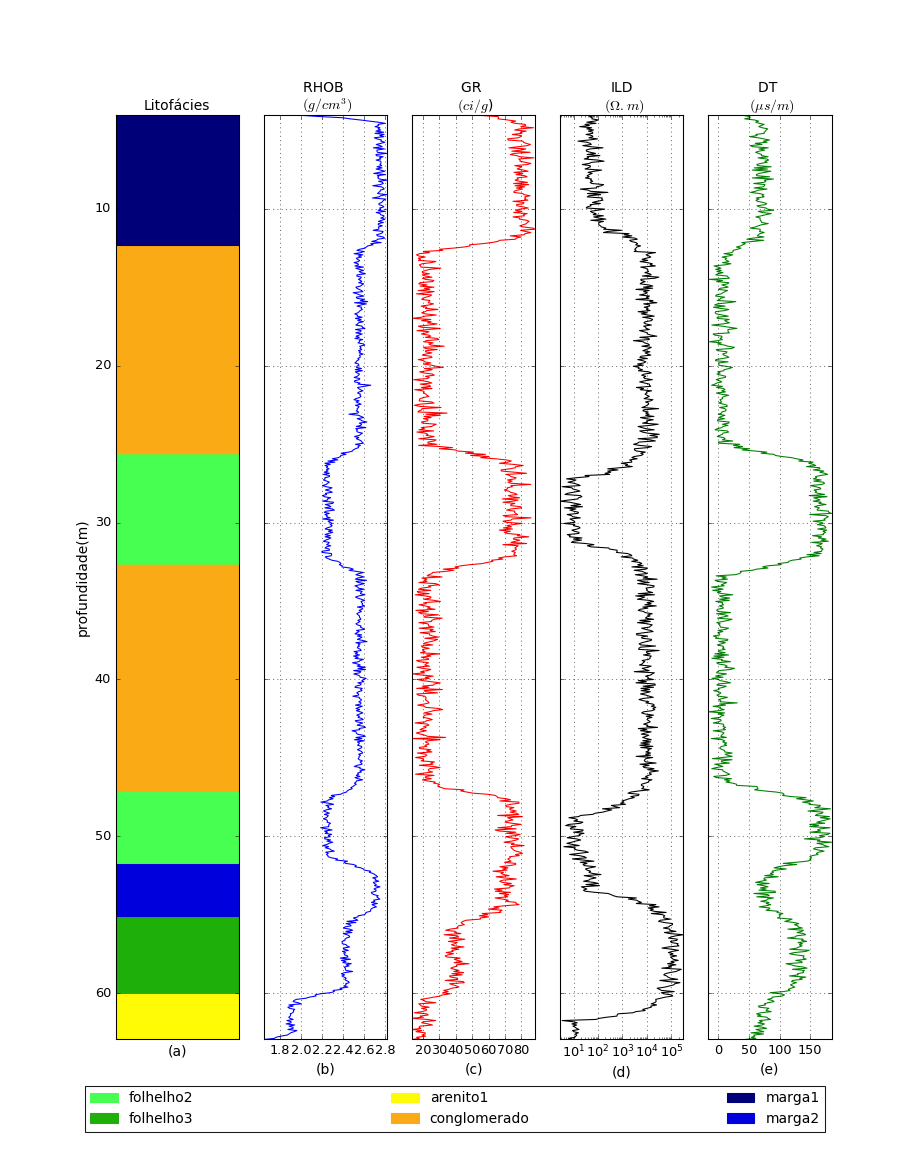

In [30]:

def order(x):
    """Cria uma lista começando do zero com o mesmo tamanho do dicionario"""
    r= [0]
    for i in range(x-1):
        i=i+1
        r.append(i)
    return r

print('ordem=',order(len(dic)))

# Gerando a imagem do poço

padrao={'comprimento':12,
            'altura':15,
         }

figure2 = plm2(5, padrao)

figure2.plot_l2(0,np.array(df.cod_rock),np.array(df.prof), dic,{'titulo':'Litofácies', 'descricao_y':'profundidade(m)','descricao_x':'(a)'})

figure2.plot_s(1,df.rhob_5,df.prof,
               {'titulo':'RHOB \n $(g/cm^{3})$','cor':'b','descricao_x':'(b)'})

figure2.plot_s(2,df.gr_5,df.prof,
               {'titulo':'GR \n $(ci/g$)','cor':'r','descricao_x':'(c)'})

figure2.plog_s(3,np.exp(df.ild_5),df.prof, 
               {'titulo':'ILD\n $(\Omega.m) $', 'cor':'k','descricao_x':'(d)'})

figure2.plot_s(4,df.dt_5,df.prof,
               {'titulo':'DT \n $(\mu s/m)$','cor':'g','descricao_x':'(e)'})

figure2.legenda({'ancoragem':(-0.25, 0.1, 6.0, -0.15),'colunas':3,'ordem':order(len(dic)) })
    
plt.savefig('../saida/perfis_5.pdf', dpi=300, bbox_inches = 'tight', transparent = True)


ordem= [0, 1, 2, 3, 4, 5]


<IPython.core.display.Javascript object>


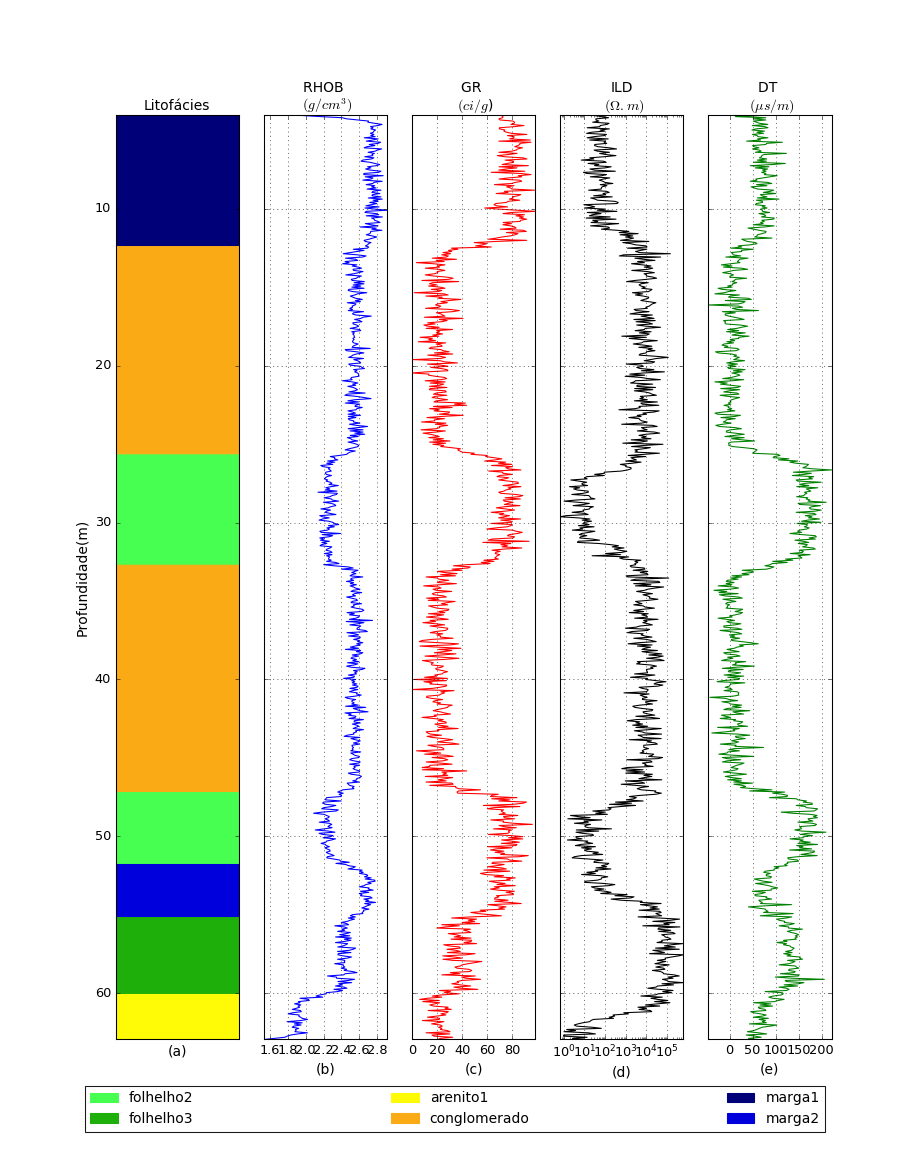

In [31]:

def order(x):
    """Cria uma lista começando do zero com o mesmo tamanho do dicionario"""
    r= [0]
    for i in range(x-1):
        i=i+1
        r.append(i)
    return r

print('ordem=',order(len(dic)))

# Gerando a imagem do poço

padrao={'comprimento':12,
            'altura':15,
         }

figure2 = plm2(5, padrao)

figure2.plot_l2(0,np.array(df.cod_rock),np.array(df.prof), dic,{'titulo':'Litofácies', 'descricao_y':'Profundidade(m)','descricao_x':'(a)'})

figure2.plot_s(1,df.rhob_10,df.prof,
               {'titulo':'RHOB \n $(g/cm^{3})$','cor':'b','descricao_x':'(b)'})

figure2.plot_s(2,df.gr_10,df.prof,
               {'titulo':'GR \n $(ci/g$)','cor':'r','descricao_x':'(c)'})

figure2.plog_s(3,np.exp(df.ild_10),df.prof,
               {'titulo':'ILD\n $(\Omega.m) $', 'cor':'k','descricao_x':'(d)'})

figure2.plot_s(4,df.dt_10,df.prof,
               {'titulo':'DT \n $(\mu s/m)$','cor':'g','descricao_x':'(e)'})

figure2.legenda({'ancoragem':(-0.25, 0.1, 6.0, -0.15),'colunas':3,'ordem':order(len(dic)) })
    
plt.savefig('../saida/perfis_10.pdf', dpi=300, bbox_inches = 'tight', transparent = True)


## Gráficos de dispersão:

<IPython.core.display.Javascript object>


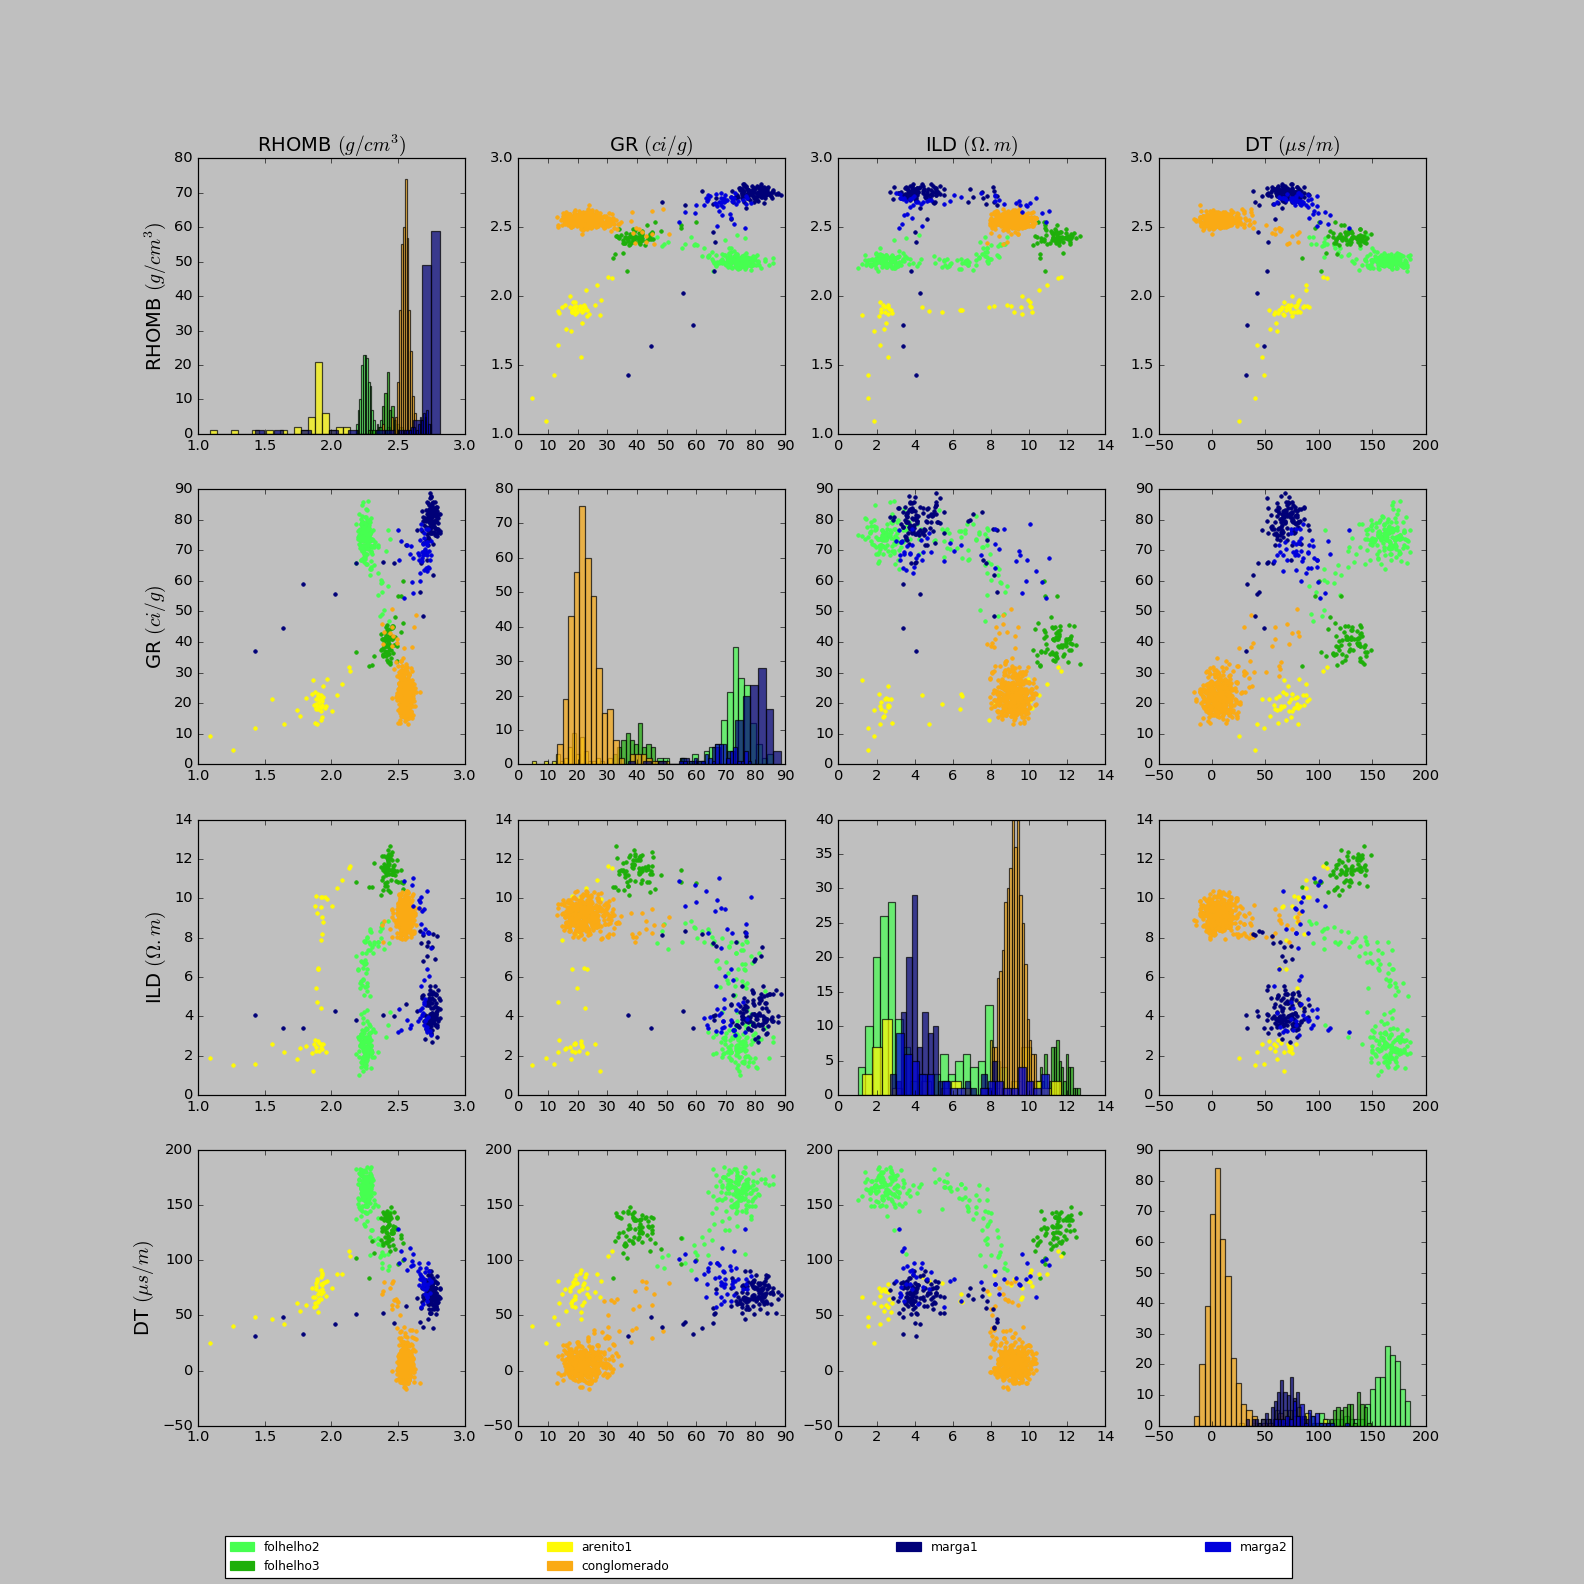

In [32]:
import matplotlib.patches as mpatches
import disper as dis

########################################### Plot da dispersão para ruído de 5% ###################################### 

dado_5 = {}
dado_5['x'] = RHOB_noise_5
dado_5['y'] = GR_noise_5
dado_5['z'] = R_noise_5
dado_5['w'] = S_noise_5

dado_info_5 = {}
dado_info_5['x'] = ['RHOMB $(g/cm^{3})$',[-1,1]]
dado_info_5['y'] = ['GR $(ci/g)$',[-1,1]]
dado_info_5['z'] = ['ILD $(\Omega.m)$',[-1,1]]
dado_info_5['w'] = ['DT $(\mu s/m)$',[-1,1]]

nova_legenda = {
    'fonte':10,
}

a = {'comprimento':3,
            'altura':5,
    'titulo_fonte':16,
    'legenda':nova_legenda,
}


nova_legenda = {}

dis.analise_dispersao(dado_5, dado_info_5, codrock, dic, posicao = [1,0,1,0,4],
                  multi_histogram = [20,0.7], padrao_usuario = a)

plt.savefig('../saida/disper_5.pdf', dpi=300, bbox_inches = 'tight', transparent = False)


<IPython.core.display.Javascript object>


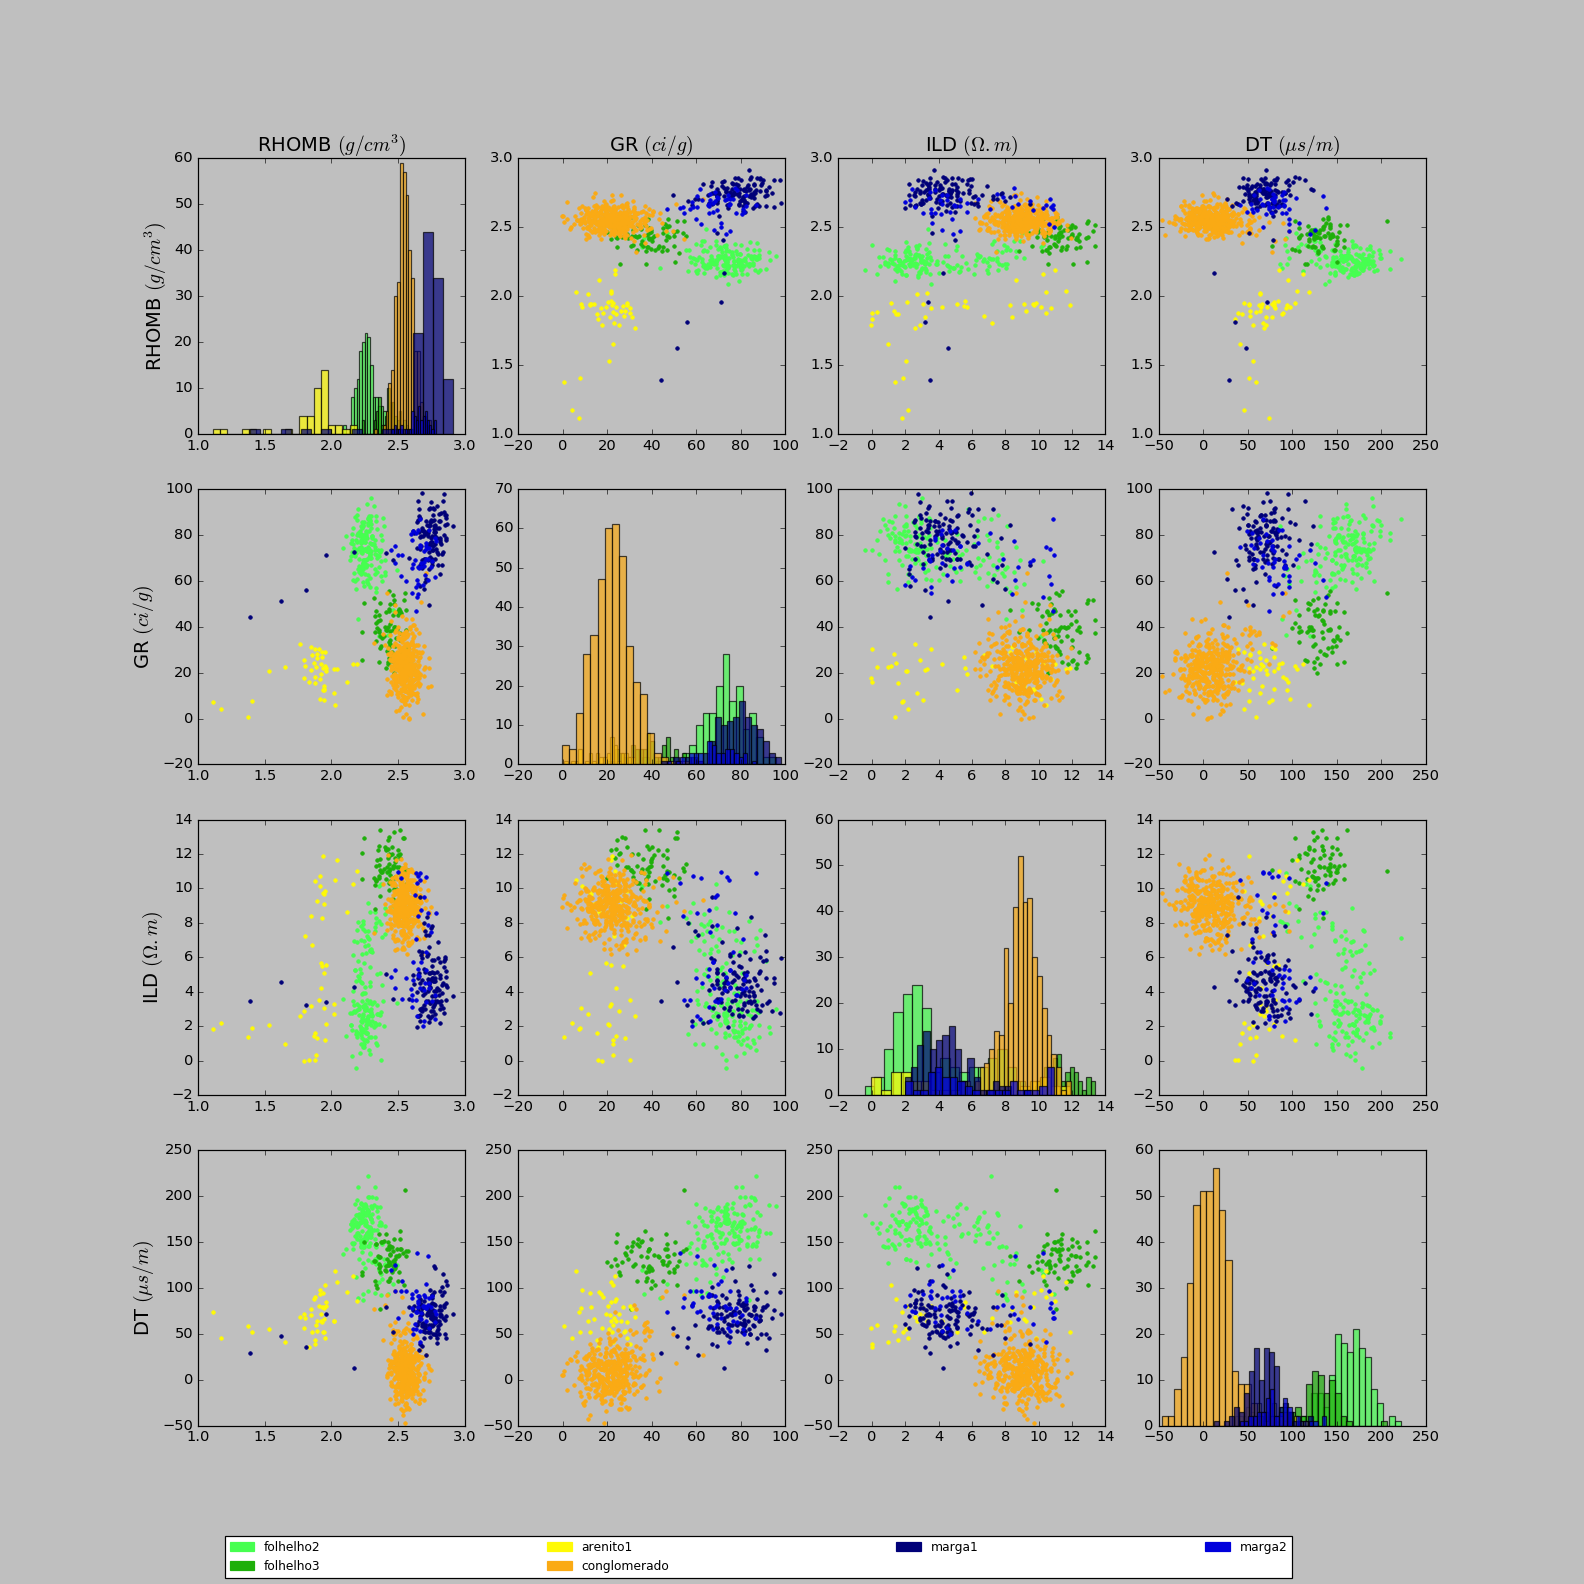

In [33]:
########################################### Plot da dispersão para ruído de 10% #####################################

dado_10 = {}
dado_10['x'] = RHOB_noise_10
dado_10['y'] = GR_noise_10
dado_10['z'] = R_noise_10
dado_10['w'] = S_noise_10

dado_info_10 = {}
dado_info_10['x'] = ['RHOMB $(g/cm^{3})$',[-1,1]]
dado_info_10['y'] = ['GR $(ci/g)$',[-1,1]]
dado_info_10['z'] = ['ILD $(\Omega.m)$',[-1,1]]
dado_info_10['w'] = ['DT $(\mu s/m)$',[-1,1]]

nova_legenda = {
    'fonte':10,
}

a = {'comprimento':5,
            'altura':5,
    'titulo_fonte':16,
    'legenda':nova_legenda,
}


nova_legenda = {}

dis.analise_dispersao(dado_10, dado_info_10, codrock, dic, posicao = [1,0,1,0,3],
                  multi_histogram = [20,0.7], padrao_usuario = a)

plt.savefig('../saida/disper_10.pdf', dpi=300, bbox_inches = 'tight', transparent = False)


In [34]:
############## Separando o arquivo em 2, um com 5% e outro com 10% ######################

d_5 = {'prof': df.prof , 'rock_id': df.cod_rock, 'rhob': df.rhob_5, 'gr': df.gr_5, 'ild': df.ild_5, 'dt': df.dt_5}
d_10 = {'prof': df.prof , 'rock_id': df.cod_rock, 'rhob': df.rhob_10, 'gr': df.gr_10, 'ild': df.ild_10, 'dt': df.dt_10}

df_5 = pd.DataFrame(data=d_5)
df_10 = pd.DataFrame(data=d_10)


In [35]:
#################### Salvando os dados de 5% e 10% de ruído em dois arquivos txt ####################

df_5.to_csv('../saida/dados_5.txt', index=False, sep= ' ')
df_10.to_csv('../saida/dados_10.txt', index=False, sep= ' ')


  # FIM